# JuSpyce API test: predictions methods

In [1]:
import sys
import os
from glob import glob
import pathlib
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

# current path
wd = pathlib.Path().resolve().parent
print(wd)

# import juspyce
sys.path.append(os.path.dirname(os.path.join(wd, "juspyce")))
from juspyce.api import JuSpyce
from juspyce.stats import *
from juspyce.utils import *

/Users/llotter/projects/juspyce


## Load JuSpyce data from test_juspyce.fit.ipynb

In [2]:
juspyce_vol = JuSpyce.from_pickle(os.path.join(wd, "testing", "test_juspyce_vol.pkl.gz"))

INFO:juspyce.api:Loaded complete object from /Users/llotter/projects/juspyce/testing/test_juspyce_vol.pkl.gz.


## Predictions

The JuSpyce core consists of several methods  to "predict" Y from X data.  
The JuSpyce.predict function has a variable named "store". If "store" is False, predictions will be calculated and the prediction dataframe(s) will be returned in a dict. If store is True, predictions will be stored as dataframes in a dict as JuSpyce.predictions["prediction_name"]. This way, results from different methods will not overwrite each other

The results are in part compared to those from other functions to check for errors. This is relevant as JuSpyce uses mostly custom implementations for, e.g., correlations and linear models that are significantly faster than the "standard" python implementations.

### Pearson correlations

In [3]:
juspyce_vol.predict(
    method="pearson", 
    r_to_z=False, # apply r to z transformation
    n_proc=1,
    store=True)
display(juspyce_vol.predictions["pearson"])

print("check")
check_res = np.zeros((juspyce_vol.Y.shape[0], juspyce_vol.X.shape[0]))
for y in range(juspyce_vol.Y.shape[0]):
    for x in range(juspyce_vol.X.shape[0]):
        check_res[y,x] = check_pearson(x=juspyce_vol.X.iloc[x,:].values,
                                       y=juspyce_vol.Y.iloc[y,:].values)
display(pd.DataFrame(check_res))

Predicting (pearson, 1 proc):   0%|          | 0/28 [00:00<?, ?it/s]

,5HT2a-cimbi36-29-beliveau2017,NMDA-ge179-29-galovic2021,mGluR5-abp688-73-smart2019,MU-carfentanil-204-kantonen2020,GABAa-flumazenil-6-dukart2018,5HT1b-p943-65-gallezot2010,D2-raclopride-156-malen2022
control,-0.426663,-0.079370,-0.233269,-0.085829,-0.399700,0.033192,-0.015343
touch,-0.191406,-0.146331,0.121694,-0.094603,-0.081260,-0.113993,-0.140186
interoception,-0.095277,0.357360,0.289272,0.291627,0.019122,0.073981,0.252232
learning,-0.612772,0.459167,-0.440161,0.281464,-0.545530,0.045298,0.718468
attention,0.152093,-0.346891,-0.065294,-0.513260,0.127016,0.055487,-0.289138
language,0.292311,-0.079031,0.183084,0.037154,0.102660,0.141787,-0.051926
interaction,-0.129552,0.005238,-0.227872,-0.401938,-0.020586,-0.062006,-0.070281
inhibition,-0.378508,-0.115512,-0.089019,-0.061578,-0.320610,0.097178,-0.001743
somatosensory,-0.161098,-0.163284,0.160802,-0.094786,-0.051313,-0.098216,-0.151470
decision,-0.344174,0.232815,-0.153768,0.456580,-0.457828,0.412249,0.674056


check


,0,1,2,3,4,5,6
0,-0.426663,-0.079370,-0.233269,-0.085829,-0.399700,0.033192,-0.015343
1,-0.191406,-0.146331,0.121694,-0.094603,-0.081260,-0.113993,-0.140186
2,-0.095277,0.357360,0.289272,0.291627,0.019122,0.073981,0.252232
3,-0.612772,0.459167,-0.440161,0.281464,-0.545530,0.045298,0.718469
4,0.152093,-0.346891,-0.065294,-0.513260,0.127016,0.055487,-0.289138
5,0.292311,-0.079031,0.183084,0.037154,0.102660,0.141787,-0.051926
6,-0.129552,0.005238,-0.227872,-0.401938,-0.020586,-0.062006,-0.070281
7,-0.378508,-0.115512,-0.089019,-0.061578,-0.320610,0.097178,-0.001743
8,-0.161098,-0.163284,0.160802,-0.094786,-0.051313,-0.098216,-0.151470
9,-0.344174,0.232815,-0.153768,0.456580,-0.457828,0.412249,0.674056


### Spearman correlations

In [4]:
juspyce_vol.predict(
    method="spearman", 
    r_to_z=False, # apply r to z transformation
    n_proc=1,
    store=True)
display(juspyce_vol.predictions["spearman"])

print("check")
check_res = np.zeros((juspyce_vol.Y.shape[0], juspyce_vol.X.shape[0]))
for y in range(juspyce_vol.Y.shape[0]):
    for x in range(juspyce_vol.X.shape[0]):
        check_res[y,x] = check_spearman(
            x=juspyce_vol.X.iloc[x,:].values,
            y=juspyce_vol.Y.iloc[y,:].values)
display(pd.DataFrame(check_res))

Predicting (spearman, 1 proc):   0%|          | 0/28 [00:00<?, ?it/s]

,5HT2a-cimbi36-29-beliveau2017,NMDA-ge179-29-galovic2021,mGluR5-abp688-73-smart2019,MU-carfentanil-204-kantonen2020,GABAa-flumazenil-6-dukart2018,5HT1b-p943-65-gallezot2010,D2-raclopride-156-malen2022
control,-0.477046,-0.192757,-0.167770,-0.093991,-0.421097,0.033699,-0.133764
touch,-0.201768,-0.207688,0.060185,-0.101657,-0.158459,-0.183677,-0.140968
interoception,-0.203906,0.413593,0.219152,0.551124,-0.070080,0.112728,0.376650
learning,-0.442394,0.260362,-0.567470,-0.078076,-0.343198,-0.231407,0.312182
attention,0.079514,-0.323892,-0.044409,-0.511921,0.084673,0.091093,-0.240818
language,0.301565,-0.106593,0.185515,0.091154,0.041218,0.220544,-0.133587
interaction,-0.166325,-0.020144,-0.285004,-0.476031,-0.042894,-0.145127,0.003744
inhibition,-0.384400,-0.182163,0.025049,0.019121,-0.373067,0.130319,-0.129874
somatosensory,-0.154261,-0.206866,0.140276,-0.056080,-0.122408,-0.147626,-0.164564
decision,-0.110583,-0.010241,-0.077077,0.207558,-0.303656,0.344166,0.036743


check


,0,1,2,3,4,5,6
0,-0.477046,-0.192757,-0.167770,-0.093991,-0.421097,0.033699,-0.133764
1,-0.201768,-0.207688,0.060185,-0.101657,-0.158459,-0.183677,-0.140968
2,-0.203906,0.413593,0.219152,0.551124,-0.070080,0.112728,0.376650
3,-0.442394,0.260362,-0.567470,-0.078076,-0.343198,-0.231407,0.312182
4,0.079514,-0.323892,-0.044409,-0.511921,0.084673,0.091093,-0.240818
5,0.301565,-0.106593,0.185515,0.091154,0.041218,0.220544,-0.133587
6,-0.166325,-0.020144,-0.285004,-0.476031,-0.042894,-0.145127,0.003744
7,-0.384400,-0.182163,0.025049,0.019121,-0.373067,0.130319,-0.129874
8,-0.154261,-0.206866,0.140276,-0.056080,-0.122408,-0.147626,-0.164564
9,-0.110583,-0.010241,-0.077077,0.207558,-0.303656,0.344166,0.036743


### Partial Pearson

In [5]:
juspyce_vol.predict(
    method="partialpearson", 
    r_to_z=False, # apply r to z transformation
    n_proc=1,
    store=True)
display(juspyce_vol.predictions["partialpearson"])

print("check")
check_res = np.zeros((juspyce_vol.Y.shape[0], juspyce_vol.X.shape[0]))
for y in range(juspyce_vol.Y.shape[0]):
    for x in range(juspyce_vol.X.shape[0]):
        check_res[y,x] = check_partialpearson(
            x=juspyce_vol.X.iloc[x,:].values,
            y=juspyce_vol.Y.iloc[y,:].values,
            z=juspyce_vol.Z.values[0,:])
display(pd.DataFrame(check_res))

Predicting (partialpearson, 1 proc):   0%|          | 0/28 [00:00<?, ?it/s]

,5HT2a-cimbi36-29-beliveau2017,NMDA-ge179-29-galovic2021,mGluR5-abp688-73-smart2019,MU-carfentanil-204-kantonen2020,GABAa-flumazenil-6-dukart2018,5HT1b-p943-65-gallezot2010,D2-raclopride-156-malen2022
control,-0.439563,0.212916,-0.012629,0.287942,-0.315345,-0.262424,0.085017
touch,-0.163370,-0.047337,0.246797,0.038643,-0.012413,-0.240124,-0.108650
interoception,-0.133766,0.291374,0.218537,0.202578,-0.049240,0.187051,0.227438
learning,-0.629198,0.469656,-0.503226,0.282278,-0.585490,0.077689,0.717281
attention,0.253804,-0.191335,0.148254,-0.362209,0.306896,-0.163743,-0.257716
language,0.288817,-0.106219,0.178105,0.016272,0.093469,0.172564,-0.059090
interaction,-0.099141,0.121093,-0.145599,-0.326164,0.051351,-0.179585,-0.036060
inhibition,-0.369359,0.127019,0.146589,0.270324,-0.220519,-0.139754,0.087999
somatosensory,-0.132953,-0.071924,0.284019,0.030963,0.016054,-0.216157,-0.121893
decision,-0.332831,0.309674,-0.115176,0.593241,-0.443135,0.395865,0.703941


check


,0,1,2,3,4,5,6
0,-0.439563,0.212916,-0.012629,0.287942,-0.315345,-0.262424,0.085017
1,-0.163370,-0.047337,0.246797,0.038643,-0.012413,-0.240124,-0.108650
2,-0.133766,0.291374,0.218537,0.202578,-0.049240,0.187051,0.227438
3,-0.629198,0.469656,-0.503226,0.282278,-0.585490,0.077689,0.717281
4,0.253804,-0.191335,0.148254,-0.362209,0.306896,-0.163743,-0.257716
5,0.288817,-0.106219,0.178105,0.016272,0.093469,0.172564,-0.059090
6,-0.099141,0.121093,-0.145599,-0.326164,0.051351,-0.179585,-0.036060
7,-0.369359,0.127019,0.146589,0.270324,-0.220519,-0.139754,0.087999
8,-0.132953,-0.071924,0.284019,0.030963,0.016054,-0.216157,-0.121893
9,-0.332831,0.309674,-0.115176,0.593241,-0.443135,0.395865,0.703941


### Partial Spearman

In [6]:
juspyce_vol.predict(
    method="partialspearman", 
    r_to_z=False, # apply r to z transformation
    n_proc=1,
    store=True)
display(juspyce_vol.predictions["partialspearman"])

print("check")
check_res = np.zeros((juspyce_vol.Y.shape[0], juspyce_vol.X.shape[0]))
for y in range(juspyce_vol.Y.shape[0]):
    for x in range(juspyce_vol.X.shape[0]):
        check_res[y,x] = check_partialspearman(
            x=juspyce_vol.X.iloc[x,:].values,
            y=juspyce_vol.Y.iloc[y,:].values,
            z=juspyce_vol.Z.values[0,:])
display(pd.DataFrame(check_res))

Predicting (partialspearman, 1 proc):   0%|          | 0/28 [00:00<?, ?it/s]

,5HT2a-cimbi36-29-beliveau2017,NMDA-ge179-29-galovic2021,mGluR5-abp688-73-smart2019,MU-carfentanil-204-kantonen2020,GABAa-flumazenil-6-dukart2018,5HT1b-p943-65-gallezot2010,D2-raclopride-156-malen2022
control,-0.468742,0.229559,-0.007421,0.285056,-0.249232,-0.150657,0.231564
touch,-0.146357,-0.026371,0.164177,0.067679,-0.029191,-0.289144,0.022426
interoception,-0.279984,0.313140,0.154563,0.487672,-0.210166,0.196064,0.281528
learning,-0.462153,0.274384,-0.601871,-0.115365,-0.394325,-0.225309,0.323729
attention,0.228117,-0.038223,0.119903,-0.351110,0.385361,-0.044721,0.017599
language,0.297722,-0.158726,0.178679,0.076494,0.023610,0.238912,-0.176691
interaction,-0.128013,0.124505,-0.240980,-0.429157,0.049370,-0.208579,0.125271
inhibition,-0.341566,0.194105,0.222828,0.396114,-0.198793,-0.005853,0.193408
somatosensory,-0.099540,-0.043936,0.242049,0.105816,0.000007,-0.239968,-0.021148
decision,-0.067162,0.145859,-0.016548,0.367091,-0.235510,0.305577,0.171131


check


,0,1,2,3,4,5,6
0,-0.468742,0.229559,-0.007421,0.285056,-0.249232,-0.150657,0.231564
1,-0.146357,-0.026371,0.164177,0.067679,-0.029191,-0.289144,0.022426
2,-0.279984,0.313140,0.154563,0.487672,-0.210166,0.196064,0.281528
3,-0.462153,0.274384,-0.601871,-0.115365,-0.394325,-0.225309,0.323729
4,0.228117,-0.038223,0.119903,-0.351110,0.385361,-0.044721,0.017599
5,0.297722,-0.158726,0.178679,0.076494,0.023610,0.238912,-0.176691
6,-0.128013,0.124505,-0.240980,-0.429157,0.049370,-0.208579,0.125271
7,-0.341566,0.194105,0.222828,0.396114,-0.198793,-0.005853,0.193408
8,-0.099540,-0.043936,0.242049,0.105816,0.000007,-0.239968,-0.021148
9,-0.067162,0.145859,-0.016548,0.367091,-0.235510,0.305577,0.171131


### Simple linear model

Will calculate $R^2$ for single linear models predicting each Y from each X.

In [7]:
juspyce_vol.predict(
    method="slr", 
    adjust_r2=False, # adjusted R2?
    n_proc=1,
    store=True)
display(juspyce_vol.predictions["slr"])

print("check")
check_res = np.zeros((juspyce_vol.Y.shape[0], juspyce_vol.X.shape[0]))
for y in range(juspyce_vol.Y.shape[0]):
    for x in range(juspyce_vol.X.shape[0]):
        check_res[y,x] = check_slr(
            x=juspyce_vol.X.iloc[x,:].values.T,
            y=juspyce_vol.Y.iloc[y,:].values.T,
            adj_r2=False)
display(pd.DataFrame(check_res))

Predicting (slr, 1 proc):   0%|          | 0/28 [00:00<?, ?it/s]

,5HT2a-cimbi36-29-beliveau2017,NMDA-ge179-29-galovic2021,mGluR5-abp688-73-smart2019,MU-carfentanil-204-kantonen2020,GABAa-flumazenil-6-dukart2018,5HT1b-p943-65-gallezot2010,D2-raclopride-156-malen2022
control,0.182042,0.006300,0.054414,0.007367,0.159760,1.101792e-03,0.000235
touch,0.036636,0.021413,0.014809,0.008950,0.006603,1.299454e-02,0.019652
interoception,0.009078,0.127706,0.083679,0.085046,0.000366,5.473213e-03,0.063621
learning,0.375489,0.210834,0.193742,0.079222,0.297603,2.052000e-03,0.516197
attention,0.023132,0.120333,0.004263,0.263436,0.016133,3.078766e-03,0.083601
language,0.085446,0.006246,0.033520,0.001380,0.010539,2.010372e-02,0.002696
interaction,0.016784,0.000027,0.051926,0.161554,0.000424,3.844739e-03,0.004939
inhibition,0.143268,0.013343,0.007924,0.003792,0.102791,9.443612e-03,0.000003
somatosensory,0.025952,0.026662,0.025857,0.008984,0.002633,9.646291e-03,0.022943
decision,0.118456,0.054203,0.023645,0.208465,0.209607,1.699490e-01,0.454351


check


,0,1,2,3,4,5,6
0,0.182042,0.006300,0.054414,0.007367,0.159760,1.101730e-03,0.000235
1,0.036636,0.021413,0.014809,0.008950,0.006603,1.299450e-02,0.019652
2,0.009078,0.127706,0.083679,0.085046,0.000366,5.473164e-03,0.063621
3,0.375489,0.210834,0.193742,0.079222,0.297603,2.051914e-03,0.516197
4,0.023132,0.120333,0.004263,0.263436,0.016133,3.078823e-03,0.083601
5,0.085446,0.006246,0.033520,0.001380,0.010539,2.010363e-02,0.002696
6,0.016784,0.000027,0.051926,0.161554,0.000424,3.844762e-03,0.004939
7,0.143268,0.013343,0.007924,0.003792,0.102791,9.443520e-03,0.000003
8,0.025952,0.026662,0.025857,0.008984,0.002633,9.646353e-03,0.022943
9,0.118456,0.054203,0.023645,0.208465,0.209607,1.699490e-01,0.454351


### Multivariate linear model

Will calculate multiple linear regression models predicting each Y from all X's. Will store the following dataframes:  
- `JuSpyce.predictions["mlr_beta"]`: len(Y) x len(X) dataframe with beta coefficients  
- `JuSpyce.predictions["mlr_full_r2"]`: len(Y) x 1 dataframe with full model $R^2$'s  
- if `mlr_individual==True`:
  - JuSpyce.predictions["mlr_individual"]: len(Y) x len(X) dataframe with predictor-wise $R^2$'s in a "leave-one-out" approach: for each predictor, the difference between an MLR with all predictors and an MLR with all predictors expept for the current one.


In [8]:
juspyce_vol.predict(
    method="mlr", 
    adjust_r2=False, # adjusted R2?
    mlr_individual=True, # calculate individual R2?
    n_proc=1,
    store=True)
for mlr in ["mlr_beta", "mlr_full_r2", "mlr_individual"]:
    print(mlr)
    display(juspyce_vol.predictions[mlr])


print("check beta")
check_res = np.zeros((juspyce_vol.Y.shape[0], juspyce_vol.X.shape[0]))
for y in range(juspyce_vol.Y.shape[0]):
    check_res[y,:] = check_beta(x=juspyce_vol.X.values.T,
                                y=juspyce_vol.Y.iloc[y,:].values.T)
display(pd.DataFrame(check_res))

Predicting (mlr, 1 proc):   0%|          | 0/28 [00:00<?, ?it/s]

mlr_beta


,5HT2a-cimbi36-29-beliveau2017,NMDA-ge179-29-galovic2021,mGluR5-abp688-73-smart2019,MU-carfentanil-204-kantonen2020,GABAa-flumazenil-6-dukart2018,5HT1b-p943-65-gallezot2010,D2-raclopride-156-malen2022
control,-0.463210,0.076000,0.333371,-0.285619,-0.665450,0.233285,-0.553785
touch,-0.469161,-0.071388,0.548121,-0.221619,-0.368110,-0.013959,-0.428344
interoception,-0.028536,0.328041,0.335662,0.027684,-0.101708,0.086049,-0.020376
learning,-0.229210,-0.002593,-0.538202,0.059453,0.349082,-0.011153,0.731421
attention,0.067232,-0.016630,0.206701,-0.596517,-0.343371,0.060219,-0.110556
language,0.569370,0.139994,0.244959,-0.073424,-0.507938,0.109270,-0.049817
interaction,-0.130126,0.240889,0.009086,-0.603852,-0.128782,-0.015525,-0.021447
inhibition,-0.520893,-0.015881,0.448087,-0.252478,-0.586494,0.262675,-0.498871
somatosensory,-0.458738,-0.086753,0.579207,-0.216110,-0.364322,-0.006177,-0.426464
decision,0.042789,-0.193624,-0.274825,0.328225,0.030235,0.331625,0.584626


mlr_full_r2


,mlr_full_r2
control,0.420572
touch,0.279467
interoception,0.224400
learning,0.727455
attention,0.300360
language,0.163424
interaction,0.263881
inhibition,0.389087
somatosensory,0.285587
decision,0.649255


mlr_individual


,5HT2a-cimbi36-29-beliveau2017,NMDA-ge179-29-galovic2021,mGluR5-abp688-73-smart2019,MU-carfentanil-204-kantonen2020,GABAa-flumazenil-6-dukart2018,5HT1b-p943-65-gallezot2010,D2-raclopride-156-malen2022
control,0.068804,0.002488,0.045244,0.034617,0.079944,0.044406,0.108542
touch,0.070583,0.002195,0.122310,0.020842,0.024463,0.000159,0.064939
interoception,0.000261,0.046344,0.045868,0.000325,0.001868,0.006042,0.000147
learning,0.016847,0.000003,0.117923,0.001500,0.021999,0.000102,0.189344
attention,0.001449,0.000119,0.017394,0.150995,0.021285,0.002959,0.004326
language,0.103955,0.008440,0.024428,0.002288,0.046577,0.009743,0.000878
interaction,0.005430,0.024990,0.000034,0.154732,0.002994,0.000197,0.000163
inhibition,0.087007,0.000109,0.081740,0.027050,0.062099,0.056299,0.088083
somatosensory,0.067482,0.003241,0.136576,0.019818,0.023962,0.000031,0.064370
decision,0.000587,0.016146,0.030748,0.045715,0.000165,0.089735,0.120969


check beta


,0,1,2,3,4,5,6
0,-0.463210,0.076000,0.333371,-0.285619,-0.665450,0.233285,-0.553785
1,-0.469161,-0.071388,0.548121,-0.221619,-0.368110,-0.013959,-0.428344
2,-0.028536,0.328041,0.335662,0.027684,-0.101708,0.086049,-0.020376
3,-0.229210,-0.002593,-0.538202,0.059453,0.349082,-0.011153,0.731421
4,0.067232,-0.016630,0.206701,-0.596517,-0.343371,0.060219,-0.110556
5,0.569370,0.139994,0.244959,-0.073424,-0.507938,0.109270,-0.049817
6,-0.130126,0.240889,0.009086,-0.603852,-0.128782,-0.015525,-0.021447
7,-0.520893,-0.015881,0.448087,-0.252478,-0.586494,0.262675,-0.498871
8,-0.458738,-0.086753,0.579207,-0.216110,-0.364322,-0.006177,-0.426464
9,0.042789,-0.193624,-0.274825,0.328225,0.030235,0.331625,0.584626


### Dominance analysis

Will calculate dominance analyses predicting each Y from all X's. Will store the following dataframes:  
- `JuSpyce.predictions["dominance_total"]`: len(Y) x len(X) dataframe with each's predictors individually explained $R^2$ in multivariate regression model for each Y
- `JuSpyce.predictions["dominance_relative"]`: len(Y) x len(X) dataframe with each's predictors relative contribution to the full $R^2$ corresponding to `dominance_total`. Each row in the dataframe should add up to 1.
- `JuSpyce.predictions["dominance_full_r2"]`: len(Y) x 1 dataframe with full model $R^2$'s. This is the sum across rows of the `dominance_total` dataframe nd should equal `mlr_full_r2`.
- `JuSpyce.predictions["dominance_individual"]`: len(Y) x len(X) dataframe with each's predictors individually explained $R^2$ corresponding to a simple linear redression (`slr`).

In [9]:
juspyce_vol.predict(
    method="dominance", 
    adjust_r2=False, # adjusted R2?
    n_proc=1,
    store=True)
for dom in ["dominance_total", "dominance_relative", "dominance_full_r2", "dominance_individual"]:
    print(dom)
    display(juspyce_vol.predictions[dom])

# check dominance analysis, requires dominance-analysis toolbox
if False:
    print("check")
    from dominance_analysis import Dominance
    check_res = np.zeros((correlater.Y.shape[0], correlater.X.shape[0]))
    for y in range(correlater.Y.shape[0]):
        check_res[y,:] = check_dominance(x=correlater.X.values.T,
                                        y=correlater.Y.iloc[y,:].values.T)
    display(pd.DataFrame(check_res))

Predicting (dominance, 1 proc):   0%|          | 0/28 [00:00<?, ?it/s]

dominance_total


,5HT2a-cimbi36-29-beliveau2017,NMDA-ge179-29-galovic2021,mGluR5-abp688-73-smart2019,MU-carfentanil-204-kantonen2020,GABAa-flumazenil-6-dukart2018,5HT1b-p943-65-gallezot2010,D2-raclopride-156-malen2022
control,0.147913,0.014475,0.032636,0.026925,0.121830,0.018801,0.057992
touch,0.080976,0.022301,0.073290,0.017817,0.029836,0.008097,0.047151
interoception,0.007750,0.076401,0.067108,0.033618,0.010086,0.005171,0.024266
learning,0.118375,0.072957,0.130110,0.025580,0.088513,0.007599,0.284321
attention,0.006852,0.047395,0.010261,0.190173,0.014129,0.003143,0.028408
language,0.091593,0.005207,0.021725,0.004623,0.023399,0.013086,0.003791
interaction,0.021849,0.017200,0.027849,0.177235,0.010744,0.001937,0.007066
inhibition,0.142532,0.022376,0.037338,0.020763,0.091369,0.029603,0.045106
somatosensory,0.073340,0.025789,0.087558,0.017290,0.027851,0.006430,0.047328
decision,0.034437,0.024866,0.025416,0.093338,0.075440,0.149707,0.246052


dominance_relative


,5HT2a-cimbi36-29-beliveau2017,NMDA-ge179-29-galovic2021,mGluR5-abp688-73-smart2019,MU-carfentanil-204-kantonen2020,GABAa-flumazenil-6-dukart2018,5HT1b-p943-65-gallezot2010,D2-raclopride-156-malen2022
control,0.351694,0.034418,0.077600,0.064020,0.289676,0.044704,0.137889
touch,0.289750,0.079796,0.262250,0.063753,0.106760,0.028972,0.168719
interoception,0.034537,0.340466,0.299055,0.149814,0.044947,0.023046,0.108136
learning,0.162725,0.100291,0.178856,0.035164,0.121675,0.010446,0.390843
attention,0.022811,0.157793,0.034161,0.633150,0.047041,0.010464,0.094581
language,0.560462,0.031862,0.132933,0.028290,0.143181,0.080077,0.023195
interaction,0.082800,0.065180,0.105538,0.671649,0.040715,0.007342,0.026777
inhibition,0.366324,0.057510,0.095964,0.053363,0.234828,0.076082,0.115928
somatosensory,0.256804,0.090301,0.306590,0.060542,0.097522,0.022517,0.165724
decision,0.053041,0.038299,0.039147,0.143761,0.116194,0.230582,0.378976


dominance_full_r2


,dominance_full_r2
control,0.420572
touch,0.279467
interoception,0.224400
learning,0.727455
attention,0.300360
language,0.163424
interaction,0.263881
inhibition,0.389087
somatosensory,0.285587
decision,0.649255


dominance_individual


,5HT2a-cimbi36-29-beliveau2017,NMDA-ge179-29-galovic2021,mGluR5-abp688-73-smart2019,MU-carfentanil-204-kantonen2020,GABAa-flumazenil-6-dukart2018,5HT1b-p943-65-gallezot2010,D2-raclopride-156-malen2022
control,0.182042,0.006300,0.054414,0.007367,0.159760,1.101792e-03,0.000235
touch,0.036636,0.021413,0.014809,0.008950,0.006603,1.299454e-02,0.019652
interoception,0.009078,0.127706,0.083679,0.085046,0.000366,5.473213e-03,0.063621
learning,0.375489,0.210834,0.193742,0.079222,0.297603,2.052000e-03,0.516197
attention,0.023132,0.120333,0.004263,0.263436,0.016133,3.078766e-03,0.083601
language,0.085446,0.006246,0.033520,0.001380,0.010539,2.010372e-02,0.002696
interaction,0.016784,0.000027,0.051926,0.161554,0.000424,3.844739e-03,0.004939
inhibition,0.143268,0.013343,0.007924,0.003792,0.102791,9.443612e-03,0.000003
somatosensory,0.025952,0.026662,0.025857,0.008984,0.002633,9.646291e-03,0.022943
decision,0.118456,0.054203,0.023645,0.208465,0.209607,1.699490e-01,0.454351


#### Plot

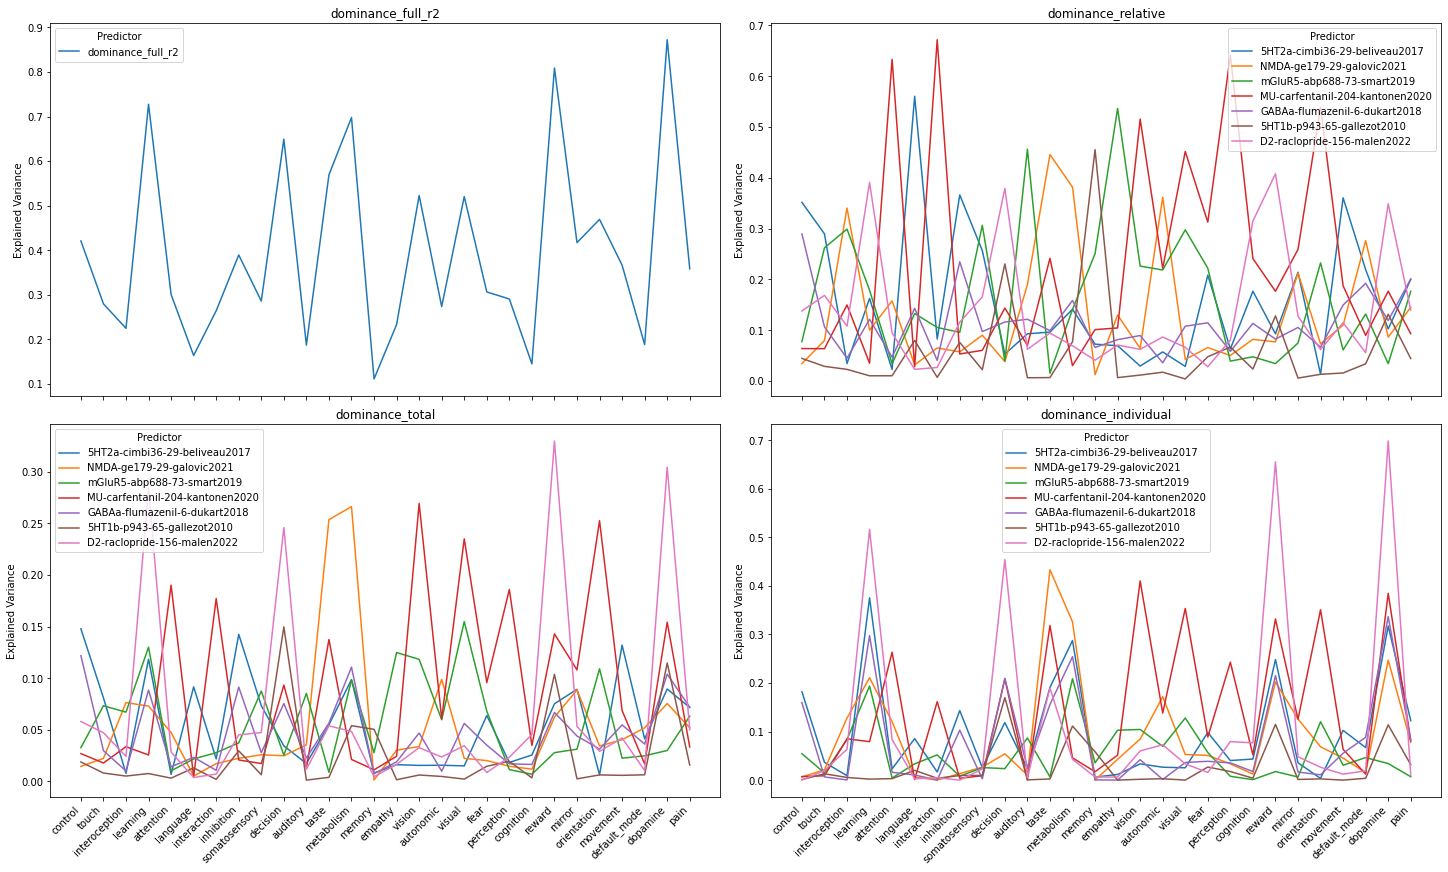

In [10]:
# just for fun: lets visualize to which extent each of our maps is explained by the predictors
fig, axes = plt.subplots(2,2, figsize=(20,12), constrained_layout=True, sharex=True)
axes = axes.ravel()
for i, dom in enumerate(["dominance_full_r2", "dominance_relative", 
                         "dominance_total", "dominance_individual"]):
    ax = axes[i]
    data = juspyce_vol.predictions[dom].reset_index()
    sns.lineplot(
        data=data.melt(
            id_vars="index",
            var_name="Predictor", 
            value_name="Explained Variance"),
        x="index",
        y="Explained Variance",
        hue="Predictor",
        ax=ax)
    ax.set_xlabel("")
    ax.set_xticks(range(data.shape[0]))
    _ = ax.set_xticklabels(data["index"], rotation=45, ha="right")
    ax.set_title(dom)

## Run prediction on modified dataframes

In [12]:
# groups
n_Y = juspyce_vol.Y.shape[0]
groups = [0] * int(n_Y/2) + [1] * int(n_Y/2)
print(n_Y, groups)

# run comparison function
juspyce_vol.compare(
    comparison="diff(mean(A),mean(B))", 
    groups=groups,
    store=True)

INFO:juspyce.api:Subtracting parcelwise mean of B from mean of A: new Y = mean(Y[A]) - mean(Y[B]).


28 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [13]:
# predict compared data
juspyce_vol.predict(
    method="spearman", 
    comparison="diff(mean(A),mean(B))",
    r_to_z=False, # apply r to z transformation
    n_proc=1,
    store=True)
display(juspyce_vol.predictions["diff(mean(A),mean(B))-spearman"])

Predicting (spearman, 1 proc):   0%|          | 0/1 [00:00<?, ?it/s]

,5HT2a-cimbi36-29-beliveau2017,NMDA-ge179-29-galovic2021,mGluR5-abp688-73-smart2019,MU-carfentanil-204-kantonen2020,GABAa-flumazenil-6-dukart2018,5HT1b-p943-65-gallezot2010,D2-raclopride-156-malen2022
"diff(mean(A),mean(B))",-0.293576,0.127329,0.061984,0.246023,-0.291639,0.068489,0.085834
